<a href="https://colab.research.google.com/github/jordanjld/BostonHousing_ex2/blob/main/Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


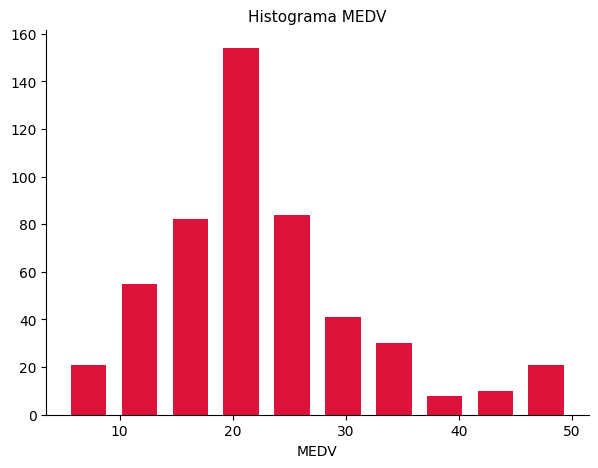

In [5]:
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(df['MEDV'],color ='crimson' ,rwidth = 0.7)

ax.set_title('Histograma MEDV', fontsize=11)
ax.set_xlabel('MEDV')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


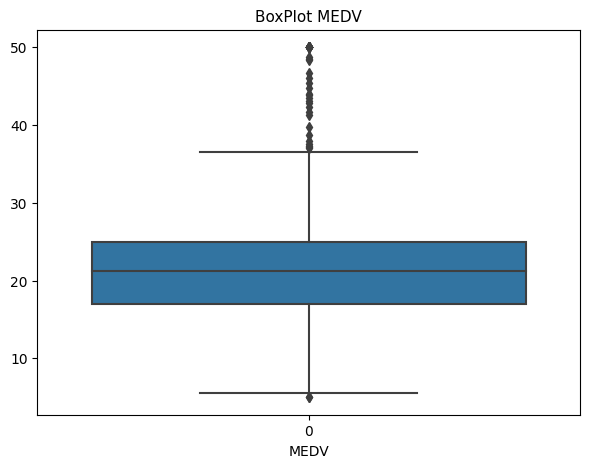

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(df['MEDV'])

ax.set_title('BoxPlot MEDV', fontsize=11)
ax.set_xlabel('MEDV')


plt.show()

Com a análise descritiva, percebemos que a média é de 22.532806. Uma informação importante, mas que não nos diz de fato como o preço está dividido.
Com os gráficos, podemos fazer uma análise visual apresentando melhor as informações. Notamos alguns outliers superiores e a concentração por volta da média.

In [7]:
correlacao = df.corr()

Text(0.5, 1.0, 'Correlacao')

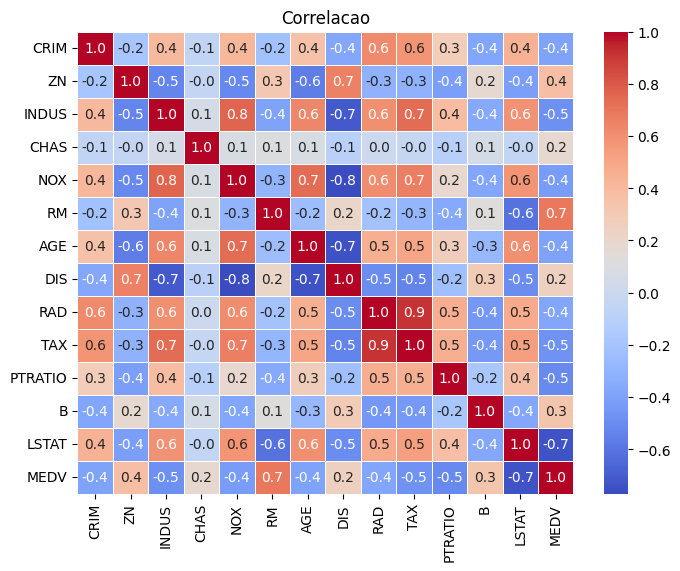

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=.6, fmt=".1f")
plt.title('Correlacao')

Fazendo uma análise pelo gráfico, podemos buscar algumas possíveis variáveis preditoras. Com correlação positiva, temos a variável RM (Número médio de quartos por habitação) com índice de 0.7, já com correlação negativa, temos a LSTAT (% população de baixa renda) com um índice de -0.7.

In [16]:
#from sklearn.linear_model import LinearRegression
#import sklearn.model_selection as ms
#from scipy import stats
#import statsmodels.api as sm

# Yukio
import statsmodels.formula.api as smf

In [18]:
modelo1 = smf.ols('MEDV ~ CRIM', data = df).fit()
modelo2 = smf.ols('MEDV ~ ZN', data = df).fit()
modelo3 = smf.ols('MEDV ~ INDUS', data = df).fit()
modelo4 = smf.ols('MEDV ~ CHAS', data = df).fit()
modelo5 = smf.ols('MEDV ~ NOX', data = df).fit()
modelo6 = smf.ols('MEDV ~ RM', data = df).fit()
modelo7 = smf.ols('MEDV ~ AGE', data = df).fit()
modelo8 = smf.ols('MEDV ~ DIS', data = df).fit()
modelo9 = smf.ols('MEDV ~ RAD', data = df).fit()
modelo10 = smf.ols('MEDV ~ TAX', data = df).fit()
modelo11 = smf.ols('MEDV ~ PTRATIO', data = df).fit()
modelo12 = smf.ols('MEDV ~ B', data = df).fit()
modelo13 = smf.ols('MEDV ~ LSTAT', data = df).fit()


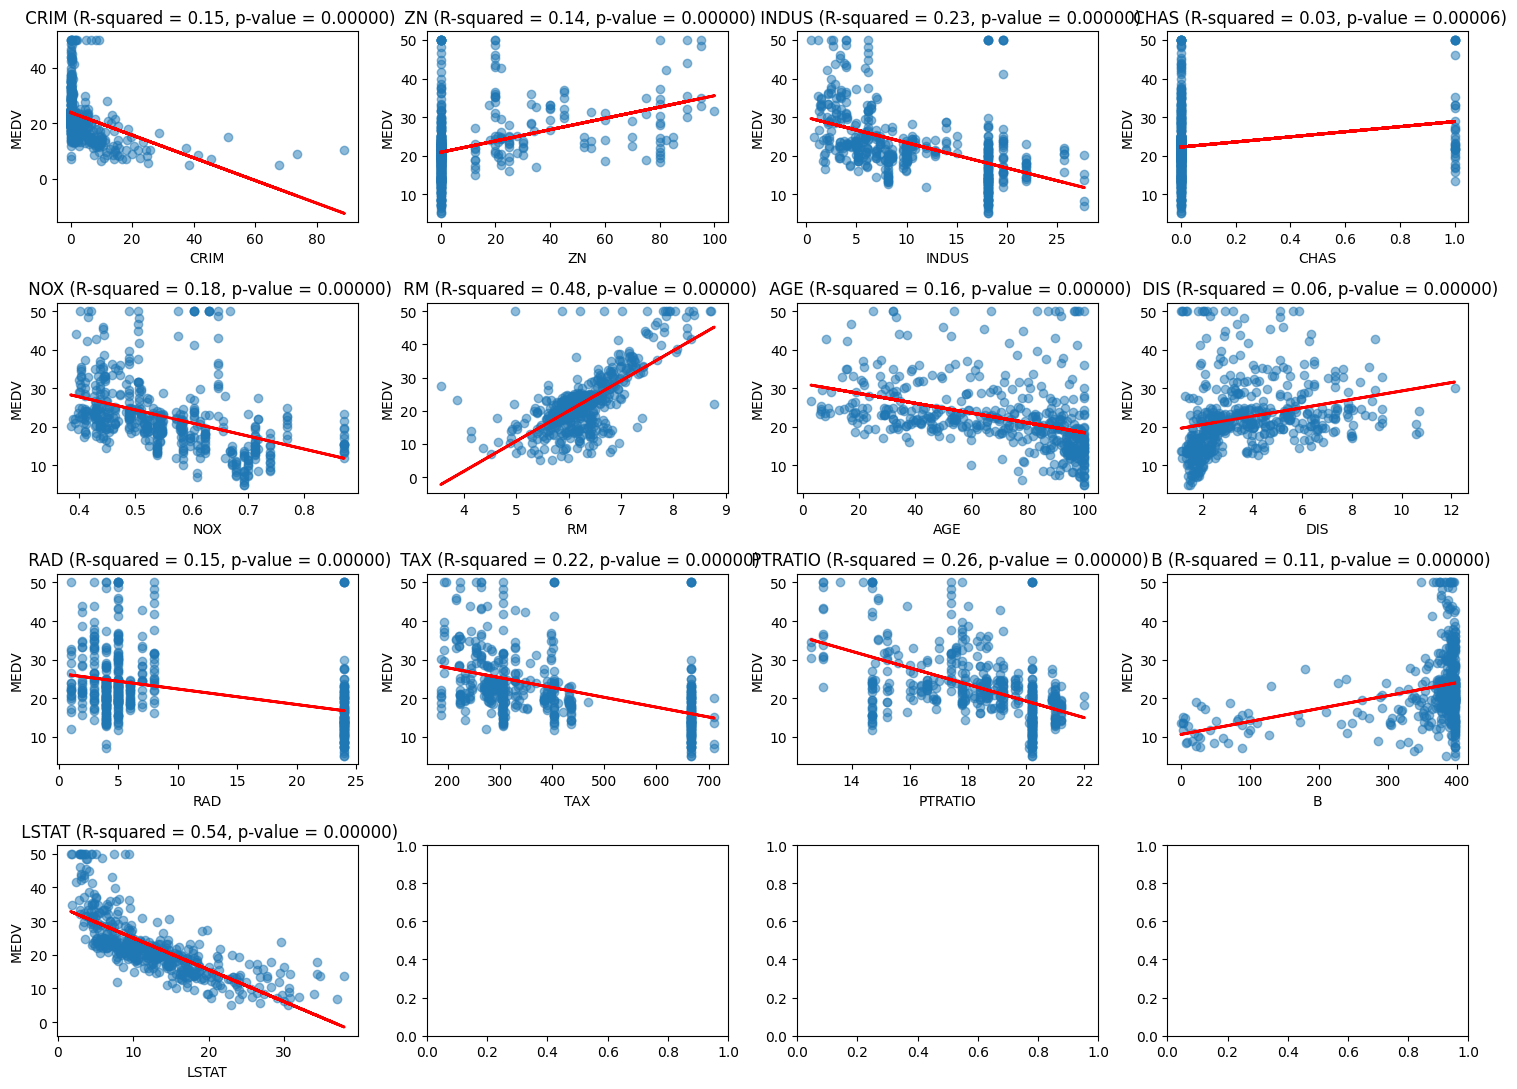

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 11))

modelos = [modelo1, modelo2, modelo3, modelo4, modelo5, modelo6, modelo7, modelo8, modelo9, modelo10, modelo11, modelo12, modelo13]

variaveis_independentes = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, (modelo, var) in enumerate(zip(modelos, variaveis_independentes)):
    row, col = divmod(i, 4)
    ax = axes[row, col]


    ax.scatter(df[var], df['MEDV'], alpha=0.5)
    ax.plot(df[var], modelo.predict(df), color='red', linewidth=2)


    rsquared = modelo.rsquared
    pvalue = modelo.pvalues[var]


    ax.set_xlabel(var)
    ax.set_ylabel('MEDV')
    ax.set_title(f' {var} (R-squared = {rsquared:.2f}, p-value = {pvalue:.5f})')
#{var}
# Ajuste a posição dos subplots e mostre o gráfico
plt.tight_layout()
plt.show()

Apesar de um R-squared relativamente alto, nosso p-value ficou muito baixo. Precisariamos de uma análise mais robusta para poder tirar conclusões melhores.